# Machine Learning Preject

In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import plotly.express as px

import warnings

from sklearn.impute import SimpleImputer as si
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix
import plotly.express as px

### Data gathering

In [32]:
# Loading the dataset
data = pd.read_csv("Cancer_Data.csv")
display(data.head(n=100))

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,0.242,...,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119,M
1,842517,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,0.181,...,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089,M
2,84300903,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,0.207,...,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088,M
3,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,M
4,84358402,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,0.181,...,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,20.260,23.030,132.400,"1,264.000",0.091,0.131,0.146,0.087,0.209,...,31.590,156.100,"1,750.000",0.119,0.354,0.410,0.157,0.369,0.084,M
96,86211,12.180,17.840,77.790,451.100,0.104,0.071,0.025,0.029,0.190,...,20.920,82.140,495.200,0.114,0.094,0.050,0.059,0.223,0.074,B
97,862261,9.787,19.940,62.110,294.500,0.102,0.053,0.007,0.008,0.135,...,26.290,68.810,366.100,0.132,0.095,0.020,0.024,0.193,0.090,B
98,862485,11.600,12.840,74.340,412.600,0.090,0.075,0.042,0.034,0.162,...,17.160,82.960,512.500,0.143,0.185,0.192,0.084,0.277,0.088,B


In [33]:
# Divide the data into input and output
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Visualization

In [34]:
# Histogram represntation
fig = px.histogram(data, 
                   x='diagnosis',
                   color = 'diagnosis',
                   text_auto=True,
                   color_discrete_sequence=["red", "blue"], 
                   template='simple_white',
                   labels={"diagnosis": "Target"},
                   title='Diagnosis Value Count'
                   )
fig.update_layout(bargap=0.5, xaxis_title="Malignant vs Benign Tumor",yaxis_title="Count")
fig.show()

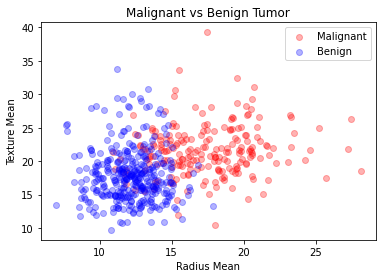

In [35]:
# Malignant Tumor 
M = data[data.diagnosis == "M"]
M.head(10)

# Benign Tumor
B = data[data.diagnosis == "B"]
B.head(10)

# Showing
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "blue", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

### Pre-Processing

In [36]:
# Replace missing data with the average of the columns values
imputer = si(missing_values=np.nan,strategy='mean')
x=imputer.fit_transform(x)

# Scaling the input 
sc=MinMaxScaler()
x[:,1:]=sc.fit_transform(x[:,1:])

In [37]:
# Encoding the output to 0s and 1s
lb=LabelEncoder()
y=lb.fit_transform(y)

### Feauture extraction

In [39]:
# Check Correlation
data_num = data.drop('diagnosis', axis=1)
corr = data_num.corr()

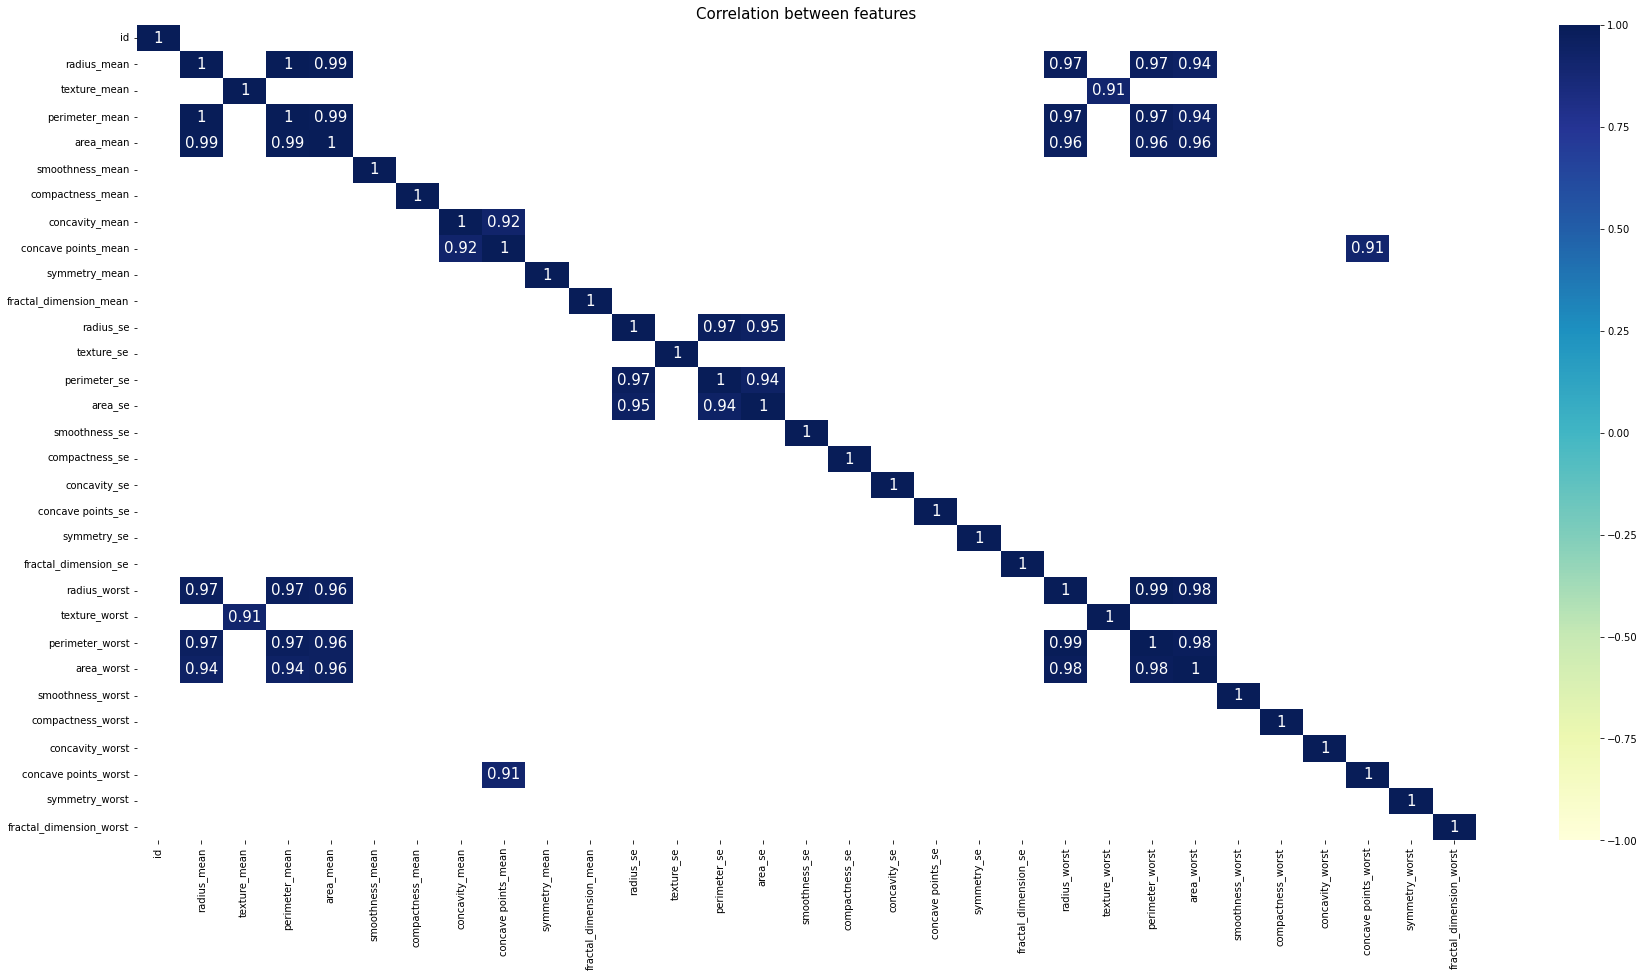

In [40]:
# ploting correlation plot
# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sbn.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

In [41]:
# Cleaning data from correlate variabels
# These feature pairs are strongly correlated to each other
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
             'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data_cleaned = data.drop(drop_list,axis = 1 )  

# removing unwanted data columns
data_cleaned = data_cleaned.drop(['id'],axis=1)
data_cleaned.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,10.380,"1,001.000",0.118,0.300,0.242,0.079,0.905,153.400,0.006,0.054,0.030,0.006,0.162,0.712,0.460,0.119,M
1,17.770,"1,326.000",0.085,0.087,0.181,0.057,0.734,74.080,0.005,0.019,0.014,0.004,0.124,0.242,0.275,0.089,M
2,21.250,"1,203.000",0.110,0.197,0.207,0.060,0.787,94.030,0.006,0.038,0.022,0.005,0.144,0.450,0.361,0.088,M
3,20.380,386.100,0.142,0.241,0.260,0.097,1.156,27.230,0.009,0.057,0.060,0.009,0.210,0.687,0.664,0.173,M
4,14.340,"1,297.000",0.100,0.198,0.181,0.059,0.781,94.440,0.011,0.057,0.018,0.005,0.137,0.400,0.236,0.077,M


### Training

In [42]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=0)

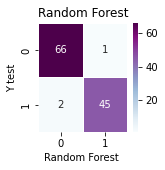

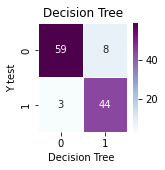

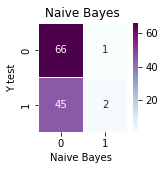

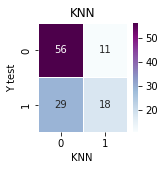

In [43]:
# Importing the models libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Random = RandomForestClassifier(random_state=0)
DT = DecisionTreeClassifier(random_state=0)
Naive = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

clfs = {"Random Forest":Random, "Decision Tree":DT, "Naive Bayes":Naive, "KNN":KNN}
pred = {}
cm = {}

for name, clf in clfs.items():
    # Fitiing
    clf.fit(x_train, y_train)
    
    # Prediction
    pred[name] = clf.predict(x_test)
    
    # Making the Confusion Matrix
    cm[name] = confusion_matrix(y_test, pred[name])

for name, cm  in (cm.items()):   
    # Confusion Matrix for each model
          plt.figure(figsize=(2,2))
          sbn.heatmap(cm, annot=True, linewidth=0.7, fmt='g', cmap="BuPu")
          plt.title(name)
          plt.xlabel(f'{name} ') 
          plt.ylabel('Y test')
          plt.show()  

### Evaluation

In [44]:
# Four ways to evalua
scoring = {'accuracy', 'precision', 'recall' , 'f1'}
accuracy = []
precission = []
recall = []
f1 = []

In [45]:
for model, pred in pred.items():
    model = clfs[model]
    scores = cross_validate(model, x, y, scoring=scoring, cv=20, n_jobs=-1)
    accuracy.append(np.mean(scores['test_accuracy']))
    precission.append(np.mean(scores['test_precision']))
    recall.append(np.mean(scores['test_recall']))
    f1.append(np.mean(scores['test_f1']))

In [46]:
pd.options.display.float_format = '{:,.3f}'.format
data={ 'Accuracy'    : accuracy,
       'Precision'   : precission,
       'Recall'      : recall,
       'f1 '         : f1,}
models = pd.DataFrame(data,index=['K-Nearest Neighbors','Naive Bayes', 'Decision Tree', 'Random Forest'])
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,f1
K-Nearest Neighbors,0.958,0.963,0.925,0.941
Naive Bayes,0.923,0.895,0.912,0.898
Decision Tree,0.621,0.100,0.009,0.017
Random Forest,0.284,0.102,0.210,0.135
